## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Set data filepaths
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and reivew files results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# print(mouse_metadata, study_results)
# mouse_metadata.info()
# study_results.info()

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# merge_df.describe()

# Display the data table for preview
# merge_df.head()


In [2]:
# Checking the number of mice.
# merge_df["Mouse ID"].value_counts()


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# merge_df.loc[merge_df.duplicated(['Mouse ID','Timepoint'])]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# merge_df.loc[merge_df['Mouse ID'] == 'g989']


In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
clean_df.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
# NOTE:  Confirms same number of mice in dataset
# clean_df["Mouse ID"].value_counts()

# NOTE:  Confirms absence of any duplicate data 
#clean_df.loc[clean_df.duplicated(['Mouse ID','Timepoint'])]

## Summary Statistics

In [7]:
# Explore difference between series and dataframe for mean values

mean = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(), 2)
mean


Drug Regimen
Capomulin    40.68
Ceftamin     52.59
Infubinol    52.88
Ketapril     55.24
Naftisol     54.33
Placebo      54.03
Propriva     52.46
Ramicane     40.22
Stelasyn     54.23
Zoniferol    53.24
Name: Tumor Volume (mm3), dtype: float64

In [8]:
## Create a summary table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Calculate Values
mean = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(), 2)
median = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(), 2)
var = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(), 2)
std = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(), 2)
sem = round(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(), 2)

# Format output and display
stats = {"Mean": mean, "Median": median, "Variance": var, "Std. Dev.": std, "Sem": sem}
statsum1_df = pd.DataFrame(stats)
statsum1_df


,Mean,Median,Variance,Std. Dev.,Sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
## Alternative method to create same table using agg function
# Use agg function to calculate statistical values acrss all drug regimens

columns = ["mean", "median", "var", "std", "sem"]
statsum2_df = round(clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": columns}), 2)
statsum3_df = round(clean_df.agg({"Tumor Volume (mm3)": columns}), 2)
statsum2_df, statsum3_df


(             Tumor Volume (mm3)                          
                            mean median    var   std   sem
 Drug Regimen                                             
 Capomulin                 40.68  41.56  24.95  4.99  0.33
 Ceftamin                  52.59  51.78  39.29  6.27  0.47
 Infubinol                 52.88  51.82  43.13  6.57  0.49
 Ketapril                  55.24  53.70  68.55  8.28  0.60
 Naftisol                  54.33  52.51  66.17  8.13  0.60
 Placebo                   54.03  52.29  61.17  7.82  0.58
 Propriva                  52.46  50.85  44.05  6.64  0.54
 Ramicane                  40.22  40.67  23.49  4.85  0.32
 Stelasyn                  54.23  52.43  59.45  7.71  0.57
 Zoniferol                 53.24  51.82  48.53  6.97  0.52,
         Tumor Volume (mm3)
 mean                 50.45
 median               48.95
 var                  79.47
 std                   8.91
 sem                   0.21)

## Bar and Pie Charts

In [10]:
## Calcualte values for charts

# Values:  Group mouse ID's by regimen to calcuulate # of mice per regimen (.nunique()) and # of timepoints (.count())
mouse_count_df = clean_df.groupby("Drug Regimen")["Mouse ID"].unique()
mouse_count = clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()
time_count = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
timepermouse = round(time_count / mouse_count, 1)

#Index:  Create series to hold index values
regimen = mouse_count.index
regimen

# Summarize data available for bar chart
experiment = {"# of Mice": mouse_count, "Tot Timepoints": time_count, "Timepoints per Mouse": timepermouse}
pd.DataFrame(experiment)


,# of Mice,Tot Timepoints,Timepoints per Mouse
Drug Regimen,,,
Capomulin,25,230,9.2
Ceftamin,25,178,7.1
Infubinol,25,178,7.1
Ketapril,25,188,7.5
Naftisol,25,186,7.4
Placebo,25,181,7.2
Propriva,25,151,6.0
Ramicane,25,228,9.1
Stelasyn,24,181,7.5


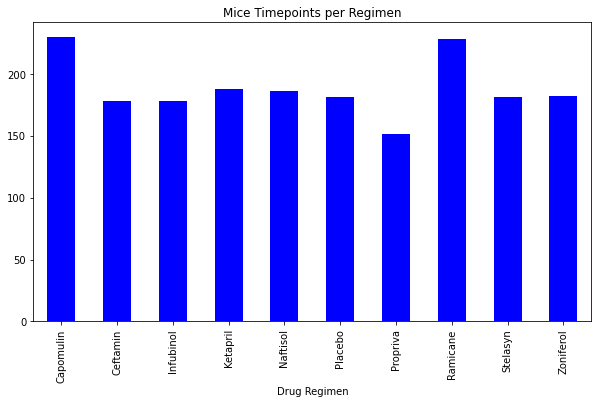

In [55]:
## Panda chart:  Create bar chart with total number of mice / treatment throughout the course of study using pandas 
# NOTE:  Using timepoints (time_count series) vs. mice, since there were only 24-25 unique mice used in each study

time_count.plot(kind="bar", figsize=(10, 5.5), color="blue")
plt.title("Mice Timepoints per Regimen")
plt.figure(1)
plt.show()


In [12]:
## Pyplot chart:  Create bar chart with total number of mice / treatment throughout the course of study using pyplot 
# Change the default size of chart to widen x-axis for better data display
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5.5
plt.rcParams["figure.figsize"] = fig_size


Text(0, 0.5, 'Mice Timepoints')

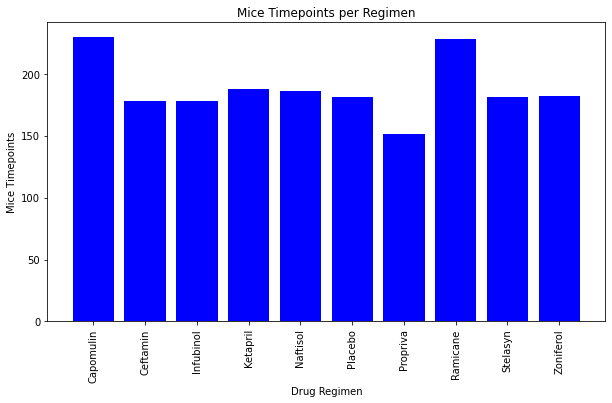

In [18]:
# Generate chart as figure 
x_axis = np.arange(len(regimen))
plt.figure(2)
plt.bar(x_axis, time_count, color="b", align="center")

# Format matplotlib chart
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen, rotation = "vertical")
plt.title("Mice Timepoints per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Timepoints")

In [32]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create data for chart
sex_df = clean_df.drop_duplicates(subset=["Mouse ID"], keep="first")
female = sex_df["Sex"].loc[sex_df["Sex"] == "Female"].count()
male = sex_df["Sex"].loc[sex_df["Sex"] == "Male"].count()
male

mouse_sex = ["Male", "Female"]
sex_value = [male, female]
colors = ["blue", "pink"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7E5215940>],
      dtype=object)

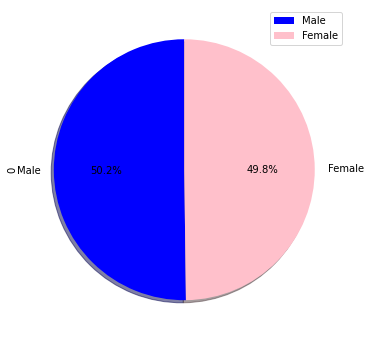

In [54]:
# Creatae pie chart using pandas  [[[figsize=(10, 5.5)]]]
df = pd.DataFrame([male, female], index=["Male", "Female"])
df.plot(kind="pie", subplots="True", startangle=90, shadow="True", figsize=(6, 6), colors=["blue", "pink"],
       autopct="%1.1f%%")


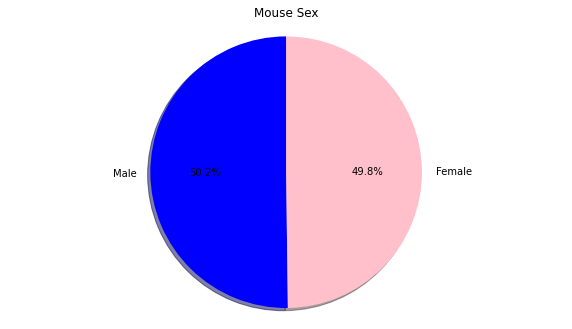

In [33]:
# Create pie chart using pyplot
plt.title("Mouse Sex")
plt.pie(sex_value, labels=mouse_sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [232]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
## Capomulin, Ramicane, Infubinol, and Ceftamin

# Calculating final tumor volume
# Step1: Sort clean_df by timepoint in ascending order
mintumor_df = clean_df.sort_values(by="Timepoint", ascending="true")

# Step 2:  Use drop duplicates to drop all duplicate mice before last appearance ==> grabs tumor vol at final timepoint
mintumor_df = mintumor_df.drop_duplicates(subset ="Mouse ID", keep="last")

# Step 3:  Confirm 249 mice IDs 
mintumor_df["Mouse ID"].count()

# Step 4:  Confirm four regimens wtih smallest final tumor -- Ramicane, Capomulin, Infubinol, and Ceftamin (tied)    
mintumor_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].min()

# Output
pd.DataFrame(mintumor_df).head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1163,l872,Placebo,Male,19,30,0,45.0,0
1315,o848,Stelasyn,Female,14,27,0,45.0,0
1216,n482,Propriva,Female,4,29,0,45.0,0
938,h428,Ketapril,Female,1,27,0,45.0,0
594,b447,Ceftamin,Male,2,30,0,45.0,0


In [227]:
##Calculate quartiles and IQR (NOTE:  Still need to calculate the IQR)

# Step 1:  Isolate by drug regimen (Note:  Tot. value count matches number of Tot Timepoints at beginning of Bar Charts)
captumor_df = mintumor_df.loc[mintumor_df["Drug Regimen"] == "Capomulin"]
ramtumor_df = mintumor_df.loc[mintumor_df["Drug Regimen"] == "Ramicane"]
inftumor_df = mintumor_df.loc[mintumor_df["Drug Regimen"] == "Infubinol"]
ceftumor_df = mintumor_df.loc[mintumor_df["Drug Regimen"] == "Ceftamin"]

# Step 2:  Calculate quartiles and print summary output
capquart = captumor_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
ramquart = ramtumor_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
infquart = ramtumor_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
cefquart = ramtumor_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])

sumout = {"Capomulin Qrtl": capquart, "Ramicane Qrtl": ramquart, "Infubinol Qrtl": infquart, "Ceftamin Qrtl": cefquart}
pd.DataFrame(sumout)

ceftumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
940,h531,Ceftamin,Male,5,27,5,47.784682,0
1122,l558,Ceftamin,Female,13,30,10,46.784535,0
840,f436,Ceftamin,Female,3,25,15,48.722078,2
1582,u149,Ceftamin,Male,24,29,25,52.925348,0
600,b487,Ceftamin,Female,6,28,25,56.057749,1
617,b759,Ceftamin,Female,12,25,30,55.742829,1


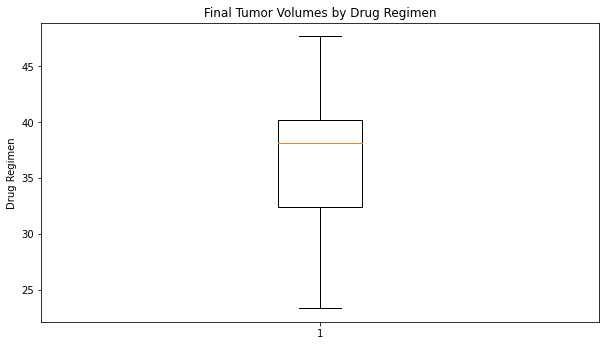

In [231]:
## Generate a box plot of the final tumor volume of each mouse across four regimens of interest

captumor = captumor_df["Tumor Volume (mm3)"]
ramtumor = ramtumor_df["Tumor Volume (mm3)"]
inftumor = inftumor_df["Tumor Volume (mm3)"]
ceftumor = ceftumor_df["Tumor Volume (mm3)"]

# ceftumor

fig5, ax5 = plt.subplots()
ax5.set_title("Final Tumor Volumes by Drug Regimen")
ax5.set_ylabel("Drug Regimen")
ax5.boxplot(captumor)
plt.show()

In [216]:
ceftumor

1370    45.0
1551    45.0
1577    45.0
1583    45.0
1398    45.0
939     45.0
984     45.0
837     45.0
1024    45.0
611     45.0
595     45.0
594     45.0
1251    45.0
1103    45.0
1113    45.0
1120    45.0
1123    45.0
1153    45.0
1846    45.0
1836    45.0
484     45.0
1788    45.0
1743    45.0
1764    45.0
1661    45.0
Name: Tumor Volume (mm3), dtype: float64

In [158]:
capquart = mintumor_df["Capoumlin"].quantile([.25, .5, .75])
capquart


the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

### NOTE:  ASSUMING INCORRECTLY THAT FINAL TUMOR VOLUME IS MIN TUMOR VOLUME; NEED TO FIX

# Step 1:  Calculate final tumor volume 
# mintumor_df = clean_df.groupby(["Drug Regimen", "Mouse ID", ])["Tumor Volume (mm3)"].min()

pd.DataFrame(mintumor_df)

captumor = round(mintumor_df["Capomulin"], 3)
ramtumor = round(mintumor_df["Ramicane"], 3)
inftumor = round(mintumor_df["Infubinol"], 3)
ceftumor = round(mintumor_df["Ceftamin"], 3)

# Calculate quartiles and print summary output  

capquart = captumor.quantile([.25, .5, .75])
ramquart = ramtumor.quantile([.25, .5, .75])
infquart = ramtumor.quantile([.25, .5, .75])
cefquart = ramtumor.quantile([.25, .5, .75])

sumout = {"Capomulin Qrtl": capquart, "Ramicane Qrtl": ramquart, "Infubinol Qrtl": infquart, "Ceftamin Qrtl": cefquart}
pd.DataFrame(sumout)

,Capomulin Qrtl,Ramicane Qrtl,Infubinol Qrtl,Ceftamin Qrtl
0.25,31.805,31.095,31.095,31.095
0.50,37.683,36.003,36.003,36.003
0.75,39.648,40.659,40.659,40.659


In [152]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

### NOTE:  ASSUMING INCORRECTLY THAT FINAL TUMOR VOLUME IS MIN TUMOR VOLUME; NEED TO FIX

# Step 1:  Create dataframe with final timempoints
merger_df = clean_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
lasttime_df = clean_df.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()

# Step 2:  Merge with clean_df on inner values
lasttumor_df = pd.merge(lasttime_df, clean_df, on="Timepoint", how="left")

pd.DataFrame(mintumor_df)

captumor = round(mintumor_df["Capomulin"], 3)
ramtumor = round(mintumor_df["Ramicane"], 3)
inftumor = round(mintumor_df["Infubinol"], 3)
ceftumor = round(mintumor_df["Ceftamin"], 3)

# Calculate quartiles and print summary output  

capquart = captumor.quantile([.25, .5, .75])
ramquart = ramtumor.quantile([.25, .5, .75])
infquart = ramtumor.quantile([.25, .5, .75])
cefquart = ramtumor.quantile([.25, .5, .75])

sumout = {"Capomulin Qrtl": capquart, "Ramicane Qrtl": ramquart, "Infubinol Qrtl": infquart, "Ceftamin Qrtl": cefquart}
pd.DataFrame(sumout)

lasttumor_df.head()


KeyError: 'Capomulin'

In [21]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [144]:


# Step1: Sort clean_df by tumor volume in ascending order
mintumor_df = clean_df.sort_values(by="Tumor Volume (mm3)", ascending="false")

# Step 2:  Use drop duplicates function to drop all duplicate mice after the first appearance
mintumor_df = mintumor_df.drop_duplicates(subset ="Mouse ID", keep="first")

# Output:  Min tumor volume for each mouse 
mintumor_df

# Alternative:  Group average volume by drug regimen to see which drugs on average had the smallest final tumor size
mintumor_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].min()


Drug Regimen
Capomulin    23.343598
Ceftamin     45.000000
Infubinol    36.321346
Ketapril     45.000000
Naftisol     45.000000
Placebo      45.000000
Propriva     45.000000
Ramicane     22.050126
Stelasyn     45.000000
Zoniferol    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [137]:
ketapril_df = clean_df.loc[clean_df["Drug Regimen"] == "Propriva"]
ketapril_df.sort_values(by="Tumor Volume (mm3)", ascending="false")


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
541,a699,Propriva,Female,5,28,0,45.000000,0
894,g570,Propriva,Male,16,29,0,45.000000,0
1531,t198,Propriva,Male,22,26,0,45.000000,0
1445,r107,Propriva,Female,2,28,0,45.000000,0
885,g558,Propriva,Male,8,29,0,45.000000,0
...,...,...,...,...,...,...,...,...
902,g570,Propriva,Male,16,29,40,68.525856,2
1658,v991,Propriva,Female,10,30,45,70.167749,4
903,g570,Propriva,Male,16,29,45,70.492788,2
1289,o562,Propriva,Female,4,25,40,71.172463,1


## Line and Scatter Plots

In [23]:
## Generate a line and scatter plots for the Capomulin regimen

# Narrow trial daat to thd drug regimen Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


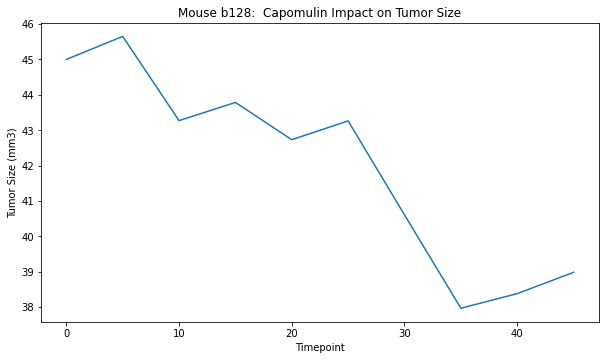

In [24]:
## For a single mouse, generate line plot of tumor volume over time

# Step 1:  Select a mouse and create data for x-axis (timepoints) and y-axis (tummor volume)
mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
x_axis = mouse["Timepoint"]
y_axis = mouse["Tumor Volume (mm3)"]

# Step 2:  Generate line plot as figure 2
plt.figure(3)
plt.plot(x_axis, y_axis)
plt.title("Mouse b128:  Capomulin Impact on Tumor Size")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Size (mm3)")

# Step 3:  Show figure
plt.show()


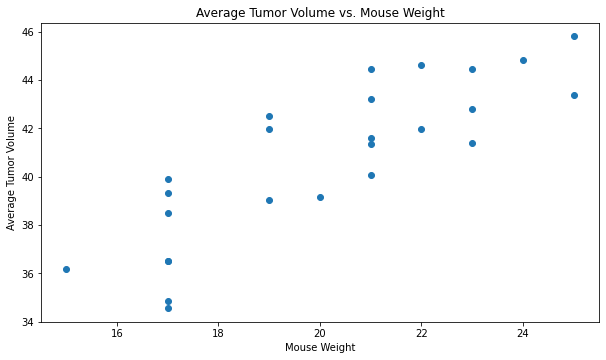

In [25]:
## For all mice in Capomulin regimen, create scatter plot of mouse weight vs. average tumor volume

# Step 1:  Calculate mouse weight and average tummor volume (Note: Average value works for weight and tumor vol))
x_axis = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
y_axis = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Step 2:  Generate line plot as figure 3
plt.figure(4)
plt.scatter(x_axis, y_axis, marker = "o")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")

# Step 3:  Show figure
plt.show()
                               

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
